In [47]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [48]:
employe_df = pd.read_csv('data/conjunto_de_dados_de_funcionarios.csv')

In [49]:
employe_df.shape

(4653, 9)

In [50]:
employe_df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [51]:
employe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [52]:
employe_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [53]:
employe_df['EverBenched'] = employe_df['EverBenched'].apply(lambda x: 1 if x == 'Yes' else '0')

In [54]:
employe_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,0,0,0
1,Bachelors,2013,Pune,1,28,Female,0,3,1
2,Bachelors,2014,New Delhi,3,38,Female,0,2,0
3,Masters,2016,Bangalore,3,27,Male,0,5,1
4,Masters,2017,Pune,3,24,Male,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,0,4,0
4649,Masters,2013,Pune,2,37,Male,0,2,1
4650,Masters,2018,New Delhi,3,27,Male,0,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,1,2,0


<Axes: >

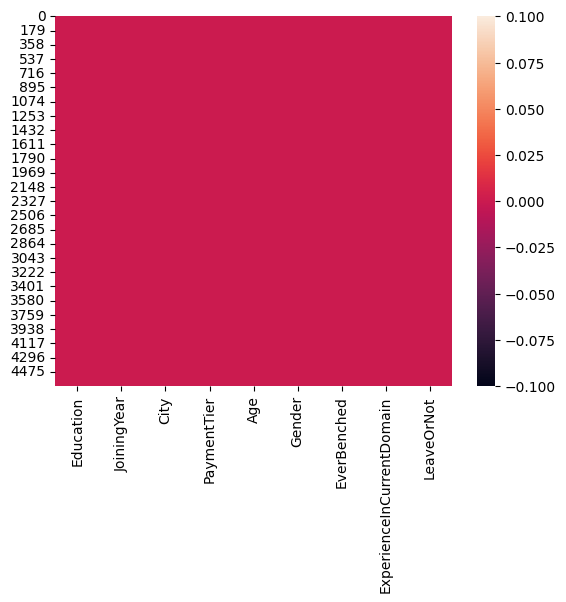

In [55]:
sns.heatmap(employe_df.isnull())

array([[<Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'PaymentTier'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'ExperienceInCurrentDomain'}>],
       [<Axes: title={'center': 'LeaveOrNot'}>, <Axes: >]], dtype=object)

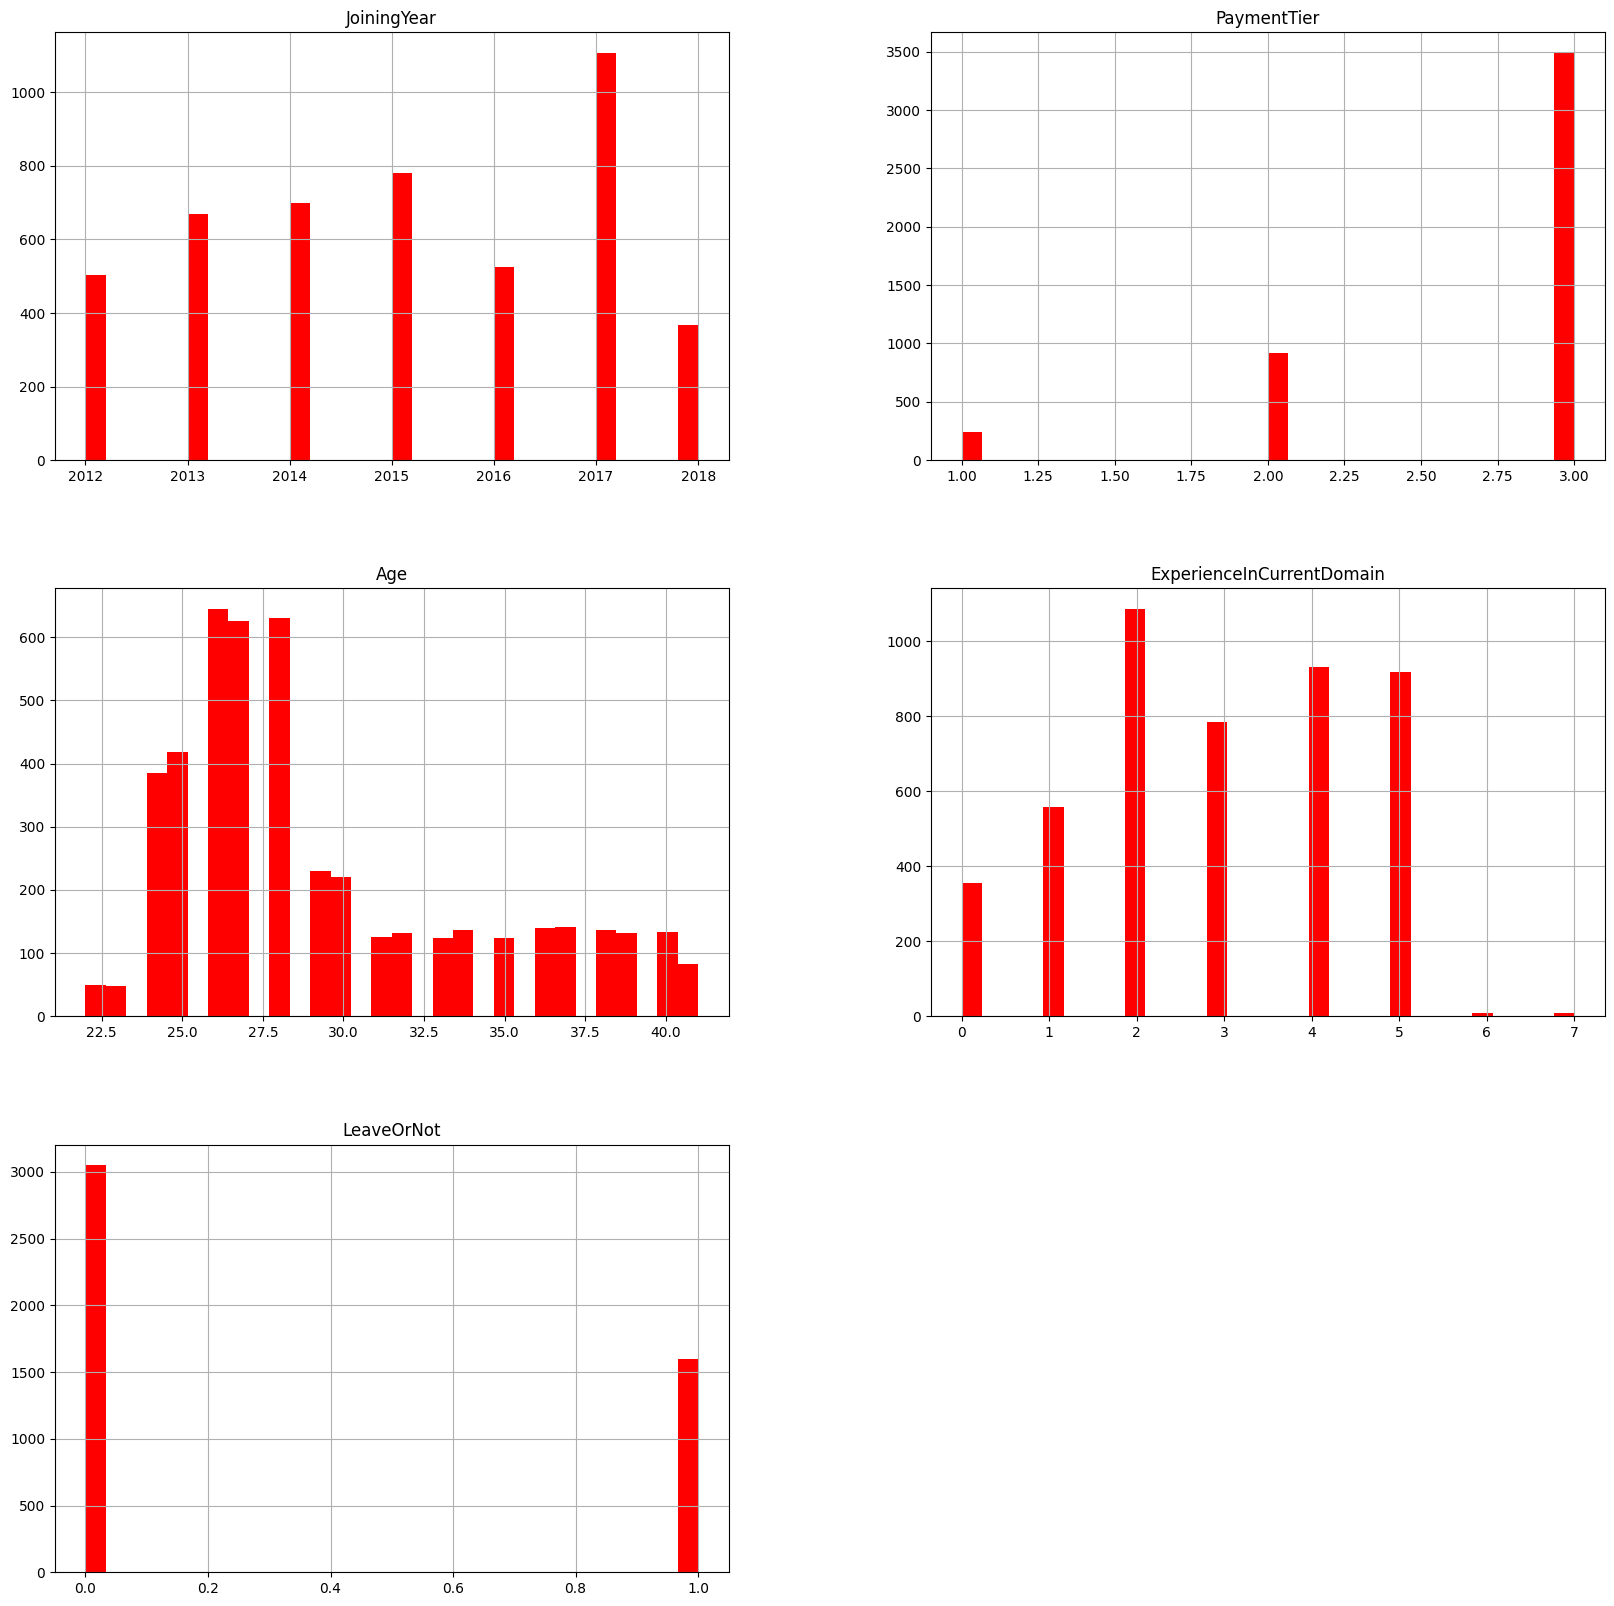

In [56]:
employe_df.hist(bins=30, figsize=(20,20), color='r')

In [57]:
set(employe_df['Education'].to_list())

{'Bachelors', 'Masters', 'PHD'}

In [58]:
city = {'Bangalore': 1, 'New Delhi': 2, 'Pune': 3}
gender = {'Female': 1, 'Male': 2 }
education = {'Bachelors': 1, 'Masters': 2, 'PHD': 3}

def rename(value: str, rename: dict):
    return rename[value]
    

In [59]:
employe_df['Education'] = employe_df['Education'].apply(lambda x: rename(value=x, rename=education))
employe_df['Gender'] = employe_df['Gender'].apply(lambda x: rename(value=x, rename=gender))
employe_df['City'] = employe_df['City'].apply(lambda x: rename(value=x, rename=city))

<Axes: >

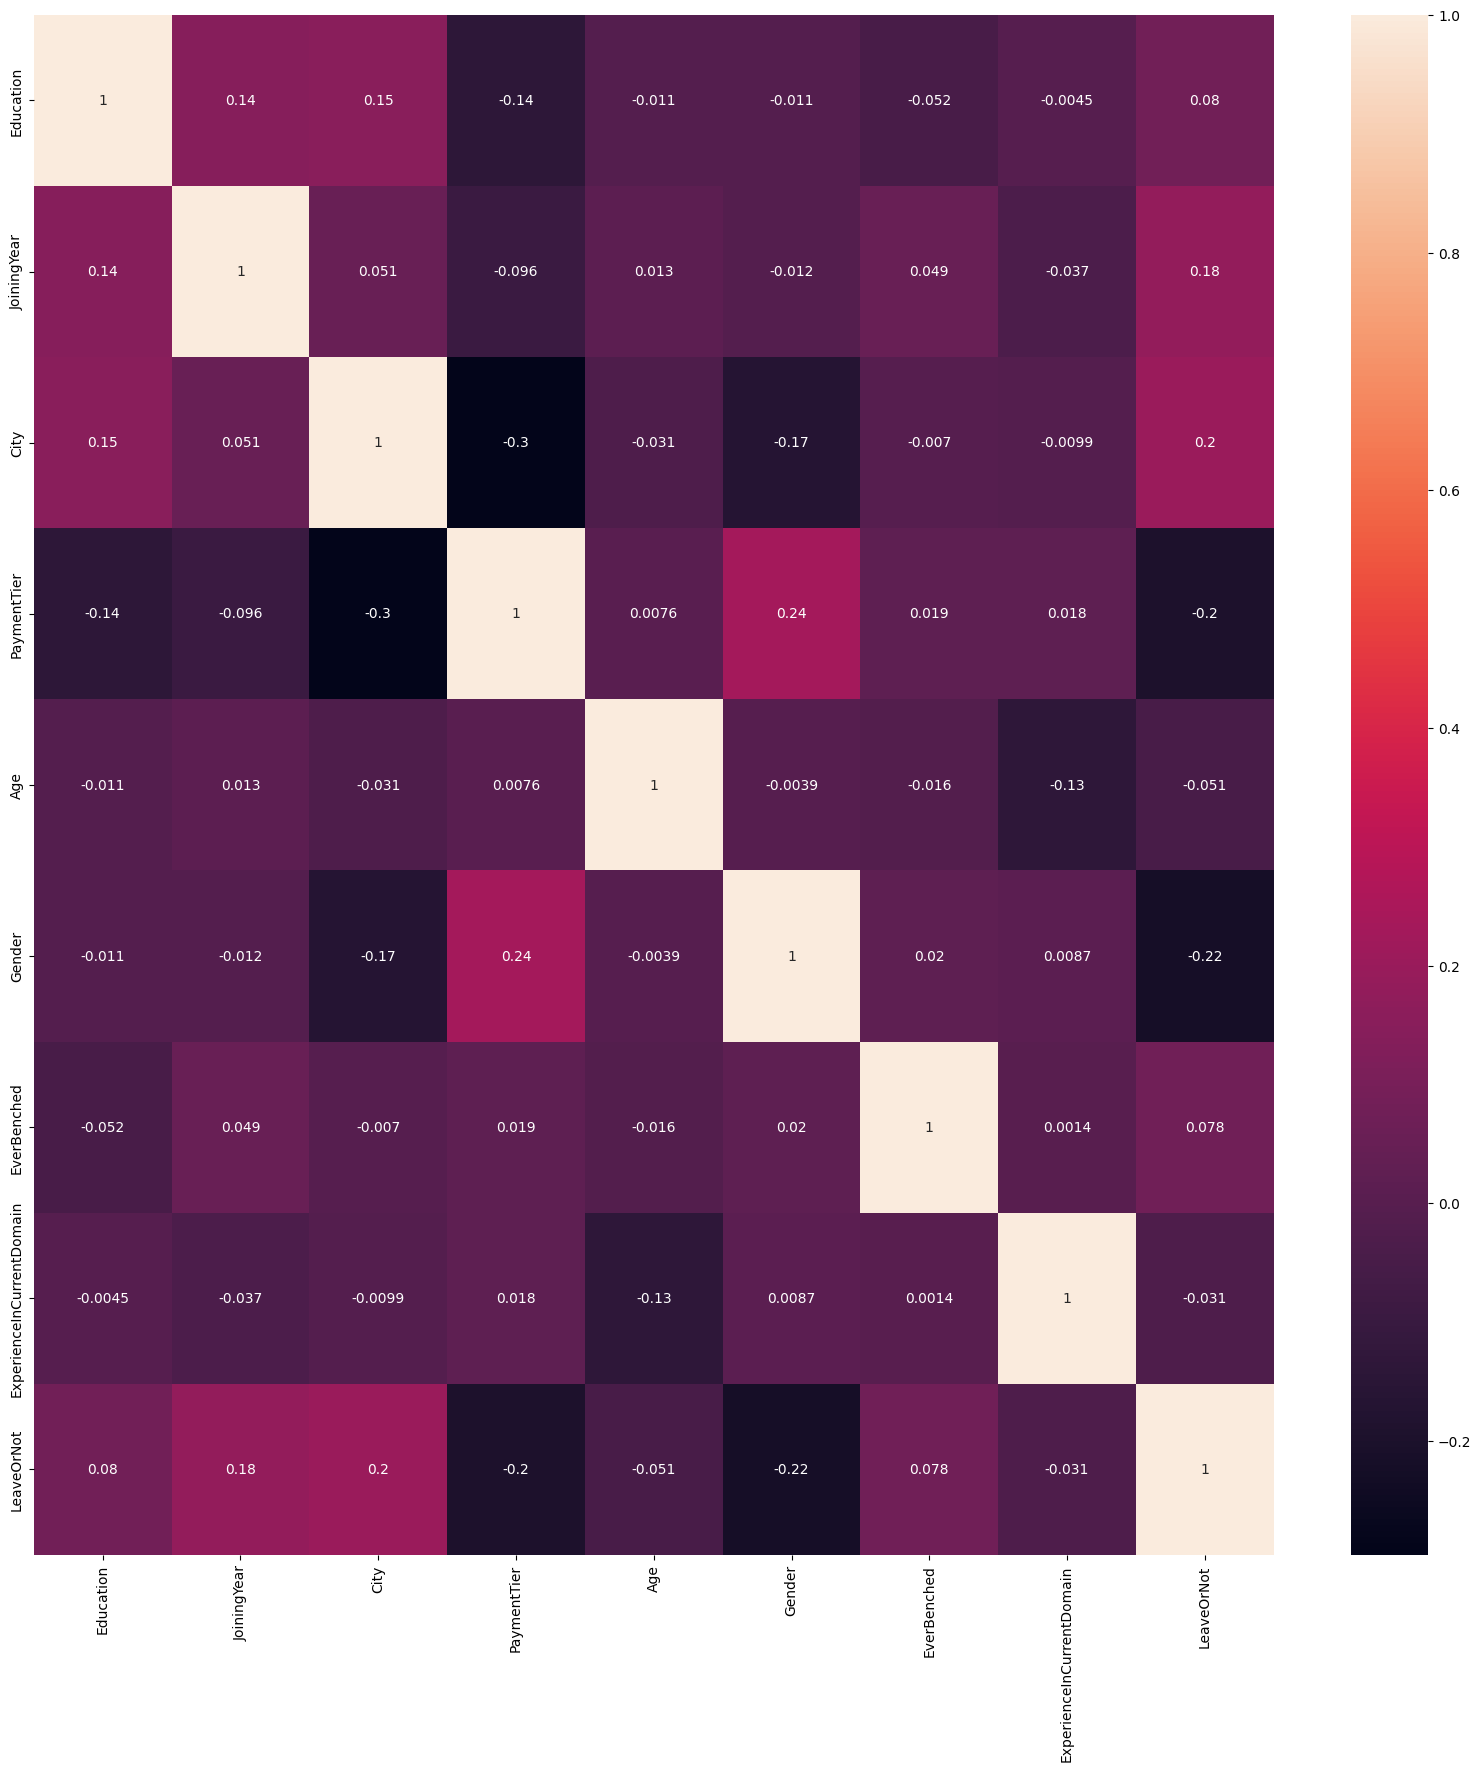

In [62]:
correlacao = employe_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True)

<Axes: >

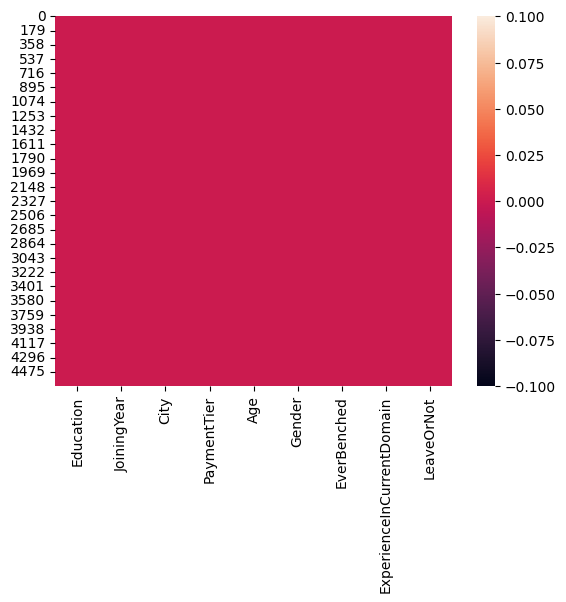

In [65]:
sns.heatmap(employe_df.isnull())

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>, <Axes: >]], dtype=object)

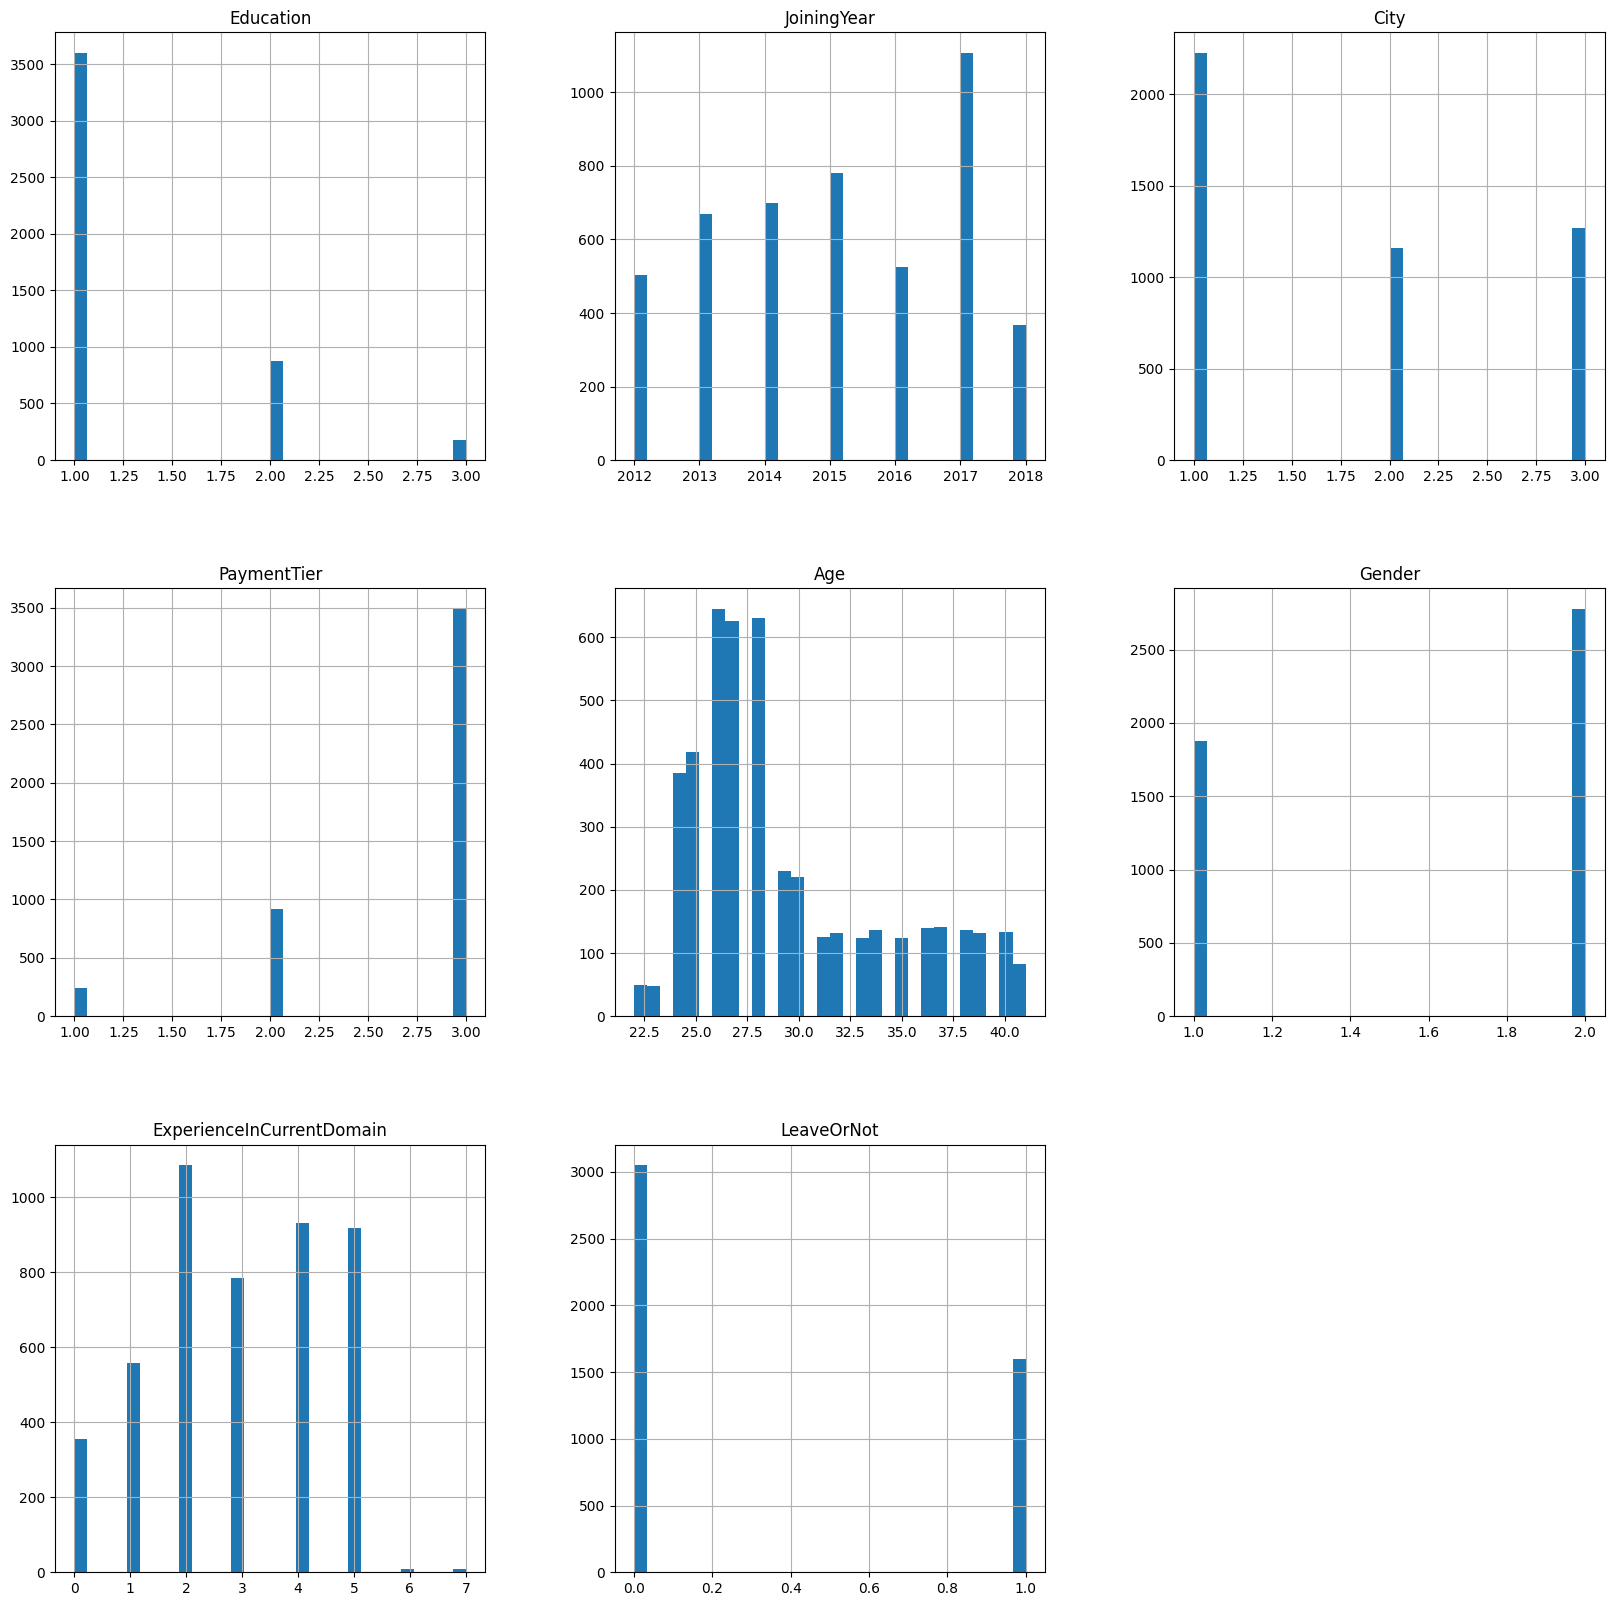

In [66]:
employe_df.hist(bins=30, figsize=(20,20))